In [1]:
import json
import os

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import nltk
import re

In [2]:
import folium
from folium import plugins
from folium.plugins import HeatMap

# LS 123 Investigation Project: Written Report

Thank you for your interest in reading our data investigation report. We hope you find our project as interesting and informative as we found it ourselves. 

To start off, we would like to explain why we chose this particular project. Our most recent president, President Trump, has been heralded as a shocking and "alarming" president, and as he so eloquently put, 'fake 'news' is everywhere. This is why we decided if the truth of his intentions as president can be found in his State of the Union address. We wanted to test our data skills and tools to see what meaning we can find in his presidential speech and how it compares to others in order to test the theory that President Trump is an "alarming" and controversial president through legitimate, new-documented speech, the State of the Union address that has been historically used by presidents as a means to vocalize their political platforms and policy intentions. 

Trump's most recent State of the Union address speech was given on February 5, 2019 at 0600hrs. pst at the House Chamber, United States Capitol, Washington D.C. As viewers of the speech, we heard various topics discussed in Trump's address, including his views on the Middle East, ISIS, tax reform, the opioid crisis amongst other topics. We wanted to evaluate how his speech topics compared to other presidents and if we could evaluate a theme to his presidential speech. In addition, we were curious to see how volatile Trump's speech is through a measured unibiased source in order to analyze polarity. 

We are also aware that as prevalent as 'fake news' is in unfortunately our community and in news, biases are also present as well. President Trump is especially notorious in how he divides and discriminates against people, but as data scientists, we are aware of the need of remaining unbiased and open in discussing our findings and analysis. All of our findings must be found in our data, and we have tried our best to reflect these protocls in order to accurately represent what we have learned and accomplished. 

### Choosing Our Data

To start off our project, we searched for a credible data source that accurately descripts the information we needed. After consideration, we decided to choose a comma-separated values (csv) file that had the presidents' names, date of their address, and speech text. This data solely containted the before-mentioned values, so we decided it was safe and unbiased in its use. 

### Data Cleaning: Regex and Word Counts
Some data cleaning measures were needed in accurately getting the speech text and consequently word count, something we were curious as to how it may have evolved according to presidents and if word count may have impact on other future findings. We used regex to clean speech text and to account for any weird grammatical spacings and punctuation that may have interefered in word counts. 

### Data Cleaning: Initial Discoveries - Word Counts 

After taking word counts for each presidents' respective speeches, we discovered that speeches varied tremendously in word counts. At first, we were puzzled by this discovery and sought any possible explanations why this might be the case. This was intitially a very troubling discovery that had us looking at our speech text data to see if any possible explanation was a possible error in cleaning the text and using regex. We did a precursory analysis of the speech text and found no errors that may have accounted for the huge spike in word counts. After having tested the average of a human's word per time ratio on a Googled site, we realized that speeches over 10,000 words in length would take hours upon hours long to read. This was startling because Trump's most speech was heralded as very long at 82 minutes and made news as the third-longest recorded State of the Union speech in media. Then we realized that much of the speeches that had huge word counts were concentrated in the first half of speeches from the earlier presidents. 

We hypothesized that the huge word count difference could be explained by some presidents having written their speeches and sent it into Congress while other presidents' shorter speeches were due to having to actually stand in front of Congress and make the speech orally. This explains why there was a huge difference in word counts; it is much easier for a human to write long written speeches than to physically have to narrate their speech for an extended amount of time.  

After this discovery, we decided to split off speeches into two categories: written and spoken as seen in the cell below to categorize speeches. The cut-off was 10,000, which we previously noted as almost impossible to achieve in spoken format given our previous discovery and research in presidential speech times. 

In [3]:
sotu = pd.read_csv('stateunion.tsv', sep='\t',  dtype={'texts':str, 'date':str, 'name':str}, index_col=0)
sotu = sotu.T # We want each speech to be a row instead of a column 
sotu = sotu.reset_index().drop(columns = ['index']) # get rid of row index
sotu = sotu.rename(columns = {'date':'y/m/d', 'name':'president', 'texts':'speech'}) # rename column for clarity purposes
sotu['y/m/d'] = pd.to_datetime(sotu['y/m/d']) # re-format structure of time data
for i in range(len(sotu['speech'])): # get rid of HTML tags and newlines 
    sotu['speech'][i] = re.sub('(?<! )(?<=[.,!:?();])(?! )', r' ', re.sub('<[^<]+?>', '', sotu['speech'][i]).replace('\n', ''))
sotu['word count'] = [len(speech.split(' ')) for speech in sotu['speech'].values] #count number of words per speech 
sotu['type'] = ['spoken' if count <= 10000 else 'written' for count in sotu['word count']] #classify speech type 
sotu.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,y/m/d,president,speech,word count,type
0,1790-01-08,George Washington,Fellow-Citizens of the Senate and House of Rep...,1008,spoken
1,1791-10-25,George Washington,Fellow-Citizens of the Senate and House of Rep...,2148,spoken
2,1792-11-06,George Washington,Fellow-Citizens of the Senate and House of Rep...,1959,spoken
3,1793-12-03,George Washington,Fellow-Citizens of the Senate and House of Rep...,1830,spoken
4,1794-11-19,George Washington,Fellow-Citizens of the Senate and House of Rep...,2706,spoken


### Data Cleaning: Discovering Missing Data Points 

After having made the discovery of written and spoken speeches, the team decided to check for missing data points. In the cell below, we decided to manually check for missing data points to make sure and note any that occured. To our consternation, we found that there was a missing data point in the year 1933. 

In [4]:
#search for missing years and speeches 
sotu['y/m/d']
pd.set_option('display.max_rows', len(sotu['y/m/d']))
sotu['y/m/d'].head()

0   1790-01-08
1   1791-10-25
2   1792-11-06
3   1793-12-03
4   1794-11-19
Name: y/m/d, dtype: datetime64[ns]

### Data Cleaning: Resolving Missing Data Points

After checking and re-checking that 1933 was our missing data point, we went over to our csv file to confirm finally for sure that 1933 was the only missing data. We made the realization that there was no clear way to check why 1933 was the year without any speech from our current data. We accepted this minor 'defeat' as to say, and we instead researched why there may have been a missing speech from this time. 

After carefuly research, we discovered that State of the Union speeches, though they fulfill the requirement set forth by Article II, Section III of the U.S. Constitution for the President must periodically "give to the Congress Information of the State of the Union, and recommend to their Consideration such measures as he shall judge necessary and expedient." Though the state of the union address has been primarily the tool for the President to deliver this requirement, it is not set-in-stone as the only tool the President has in giving information to Congress. From "State of the Union Address | US House of Representatives: History, Art & Archives". history.house.gov, President have made the State of the Union addresses -- especially in its spoken form across media outlets where it is viewed worldwide and to the masses -- as a tool in rallying support for the Presidents' agenda, but the President is not forced to use the State of the Union address. Although it has historically been accepted as an important part of the President's tasks, Presidents still have the option of other tools. In the year 1933, we discovered that President FDR decided to replace what is considered as his spot for his annual State of the Union address with a fireside speech instead.  

In [6]:
#1993, 2001, 2009 and 2017 not official sotu, and 1933 is FDR replaced it with fireside 

In [7]:
#checking how our table looks 
sotu[sotu['president'] == 'Grover Cleveland']

,y/m/d,president,speech,word count,type
95,1885-12-08,Grover Cleveland,To the Congress of the United States: Your ass...,18462,written
96,1886-12-06,Grover Cleveland,To the Congress of the United States: In disch...,14200,written
97,1887-12-06,Grover Cleveland,To the Congress of the United States: You are ...,4964,spoken
98,1888-12-03,Grover Cleveland,To the Congress of the United States: As you a...,8468,spoken
103,1893-12-03,Grover Cleveland,To the Congress of the United States: The cons...,11732,written
104,1894-12-02,Grover Cleveland,To the Congress of the United States: The asse...,15188,written
105,1895-12-07,Grover Cleveland,To the Congress of the United States: The pres...,13766,written
106,1896-12-04,Grover Cleveland,To the Congress of the United States: As repre...,14734,written


### Data Cleaning: A New Data Source

After handling the debacle of the missing data point, we realized latter in our project that although we for sure wanted to check sentiment analysis of presidents' speeches, we were missing a few data indexes that we though we might need. One thing for sure we wanted were parties to check how presidents compared in their sentiment across parties. In order to get this information, we decided to search for a new data source and came across a promising data file with more than we needed. However, that was acceptable to us than something that was missing data we might need, so after consideration, we decided to keep what we thought we would need for our project and is relevant: party and home state. Thus, we then combined our two data sources together through joining them on the index of president name. 

In [8]:
#checking what is in our new data source
presidents = pd.read_csv('revised_presidents.csv')
presidents.columns

Index(['Presidency ', 'President ', 'Wikipedia Entry', 'Took office ',
       'Left office ', 'Party ', 'Portrait', 'Thumbnail', 'Home State'],
      dtype='object')

In [9]:
#dropping columns we do not need and is not relevant to our project that might clutter it 
presidents = presidents.drop(columns = ["Presidency ", "Wikipedia Entry",'Took office ', "Left office ", "Portrait", 'Thumbnail'])

In [10]:
#our new beautiful, combined table 
revised_sotu = sotu.join(presidents.set_index('President '), on='president')
revised_sotu.head()

,y/m/d,president,speech,word count,type,Party,Home State
0,1790-01-08,George Washington,Fellow-Citizens of the Senate and House of Rep...,1008,spoken,Independent,Virginia
1,1791-10-25,George Washington,Fellow-Citizens of the Senate and House of Rep...,2148,spoken,Independent,Virginia
2,1792-11-06,George Washington,Fellow-Citizens of the Senate and House of Rep...,1959,spoken,Independent,Virginia
3,1793-12-03,George Washington,Fellow-Citizens of the Senate and House of Rep...,1830,spoken,Independent,Virginia
4,1794-11-19,George Washington,Fellow-Citizens of the Senate and House of Rep...,2706,spoken,Independent,Virginia


### Data Cleaning: Missing Values in our New, Combined Table 

After combining our table, we discovered to our consternation again that there were missing data points. After carefully checking our new data source, we discovered that the missing points (various presidents' party and homes states) were not missing on our actual csv file but still shows 'NaN' values on our table. We decided to check what might be causing this issue and discovered it to be a problem in how spaces and commas were used in the original csv file -- some extraneous spaces and commas were causing the file to skip over these data points and show instead 'NaN' values. After careful consideration, we decided it would be best and safer to simply manually input the missing data points ourselves into the table after referencing with the original csv file to ensure we would also not be adding extraneous spaces as well and mess with the data. 

In [12]:
#adding in missing data points from the csv file 
revised_sotu = revised_sotu.set_value(184, 'Party ', "Republican")
revised_sotu = revised_sotu.set_value(184, 'Home State', "Michigan")
revised_sotu = revised_sotu.set_value(185, 'Party ', "Republican")
revised_sotu = revised_sotu.set_value(185, 'Home State', "Michigan")
revised_sotu = revised_sotu.set_value(186, 'Party ', "Republican")
revised_sotu = revised_sotu.set_value(186, 'Home State', "Michigan")
revised_sotu = revised_sotu.set_value(218, 'Party ', "Democratic")
revised_sotu = revised_sotu.set_value(218, 'Home State', "Illinois")
revised_sotu = revised_sotu.set_value(219, 'Party ', "Democratic")
revised_sotu = revised_sotu.set_value(219, 'Home State', "Illinois")
revised_sotu = revised_sotu.set_value(220, 'Party ', "Democratic")
revised_sotu = revised_sotu.set_value(220, 'Home State', "Illinois")
revised_sotu = revised_sotu.set_value(221, 'Party ', "Democratic")
revised_sotu = revised_sotu.set_value(221, 'Home State', "Illinois")
revised_sotu = revised_sotu.set_value(222, 'Party ', "Democratic")
revised_sotu = revised_sotu.set_value(222, 'Home State', "Illinois")
revised_sotu = revised_sotu.set_value(223, 'Party ', "Democratic")
revised_sotu = revised_sotu.set_value(223, 'Home State', "Illinois")
revised_sotu = revised_sotu.set_value(224, 'Party ', "Democratic")
revised_sotu = revised_sotu.set_value(224, 'Home State', "Illinois")
revised_sotu = revised_sotu.set_value(225, 'Party ', "Democratic")
revised_sotu = revised_sotu.set_value(225, 'Home State', "Illinois")
revised_sotu.head() 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please us

,y/m/d,president,speech,word count,type,Party,Home State
0,1790-01-08,George Washington,Fellow-Citizens of the Senate and House of Rep...,1008,spoken,Independent,Virginia
1,1791-10-25,George Washington,Fellow-Citizens of the Senate and House of Rep...,2148,spoken,Independent,Virginia
2,1792-11-06,George Washington,Fellow-Citizens of the Senate and House of Rep...,1959,spoken,Independent,Virginia
3,1793-12-03,George Washington,Fellow-Citizens of the Senate and House of Rep...,1830,spoken,Independent,Virginia
4,1794-11-19,George Washington,Fellow-Citizens of the Senate and House of Rep...,2706,spoken,Independent,Virginia


## Data Investigation Project: Graphs and Analysis - Word Counts 

After cleaning our data, we decided to then work on making the actual visual graphs that would help us analyze our Data Investigation Project key questions: What can we take away from the State of the Union addresses? How have they changed historically and in sentiment and in intent?  

To answer how speeches have changed historically, we decided to plot how speeches have changed  in word counts over the years from written and spoken speeches. After checking our graph, we can see that the average spoken speech hovers around 5000 words while written speeches are over 10,000 in length, understandably because the President has time to write down his thoughts and not be constrained by physical impediments. 

Other discoveries are that our first President, George Washington, had the spot for the shortest State of the Union address in 1790 at around 1000 words. President Jimmy Carter had the longest written speech at over 30,000 words in 1981 while President Bill Clinton had the longest spoken speech at around 9,000 words in 1995. 

In addition, as we previously noted in our Discoveries on word counts, there has been a historical trend in how speeches are addressed and used in their format. After 1913, President Woodrow Wilson pioneered the concept that spoken speeches in-person at Congress can be used to rally the public and support for presidential agenda when previously, speeches were usually written for a long time in the earlier 18 and 19 centuries. This discovery is emphasized in how the average speech for the 19th century was 10,000 words while the late 20th century hovers around 5,000 words. This is because Presidents have found a tool that works in their favor to bring attention to their speech and their agendas by making their intent clear to Congress and the public through media. 

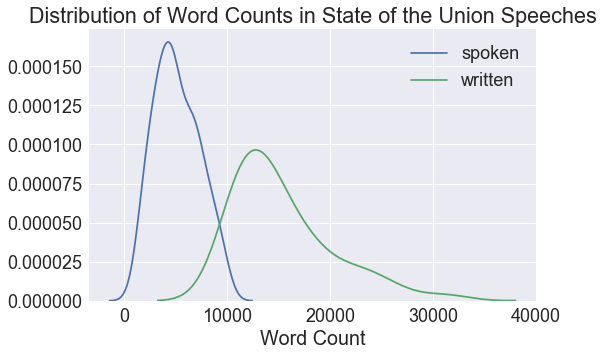

In [13]:
spoken = sotu[sotu['type'] == 'spoken']['word count']
written = sotu[sotu['type'] == 'written']['word count']
plt.figure(figsize=(8,5))
sns.set(font_scale=1.8)


g_1 = sns.distplot(spoken, hist = False, label = 'spoken')
sns.distplot(written, hist = False, label = 'written')
plt.title('Distribution of Word Counts in State of the Union Speeches')
plt.xlabel('Word Count')
plt.legend();

In [14]:
#checking our table length and values 
#tlen = pd.Series(data=spoken['len'].values, index=data['Date'])

## Data Invesigation Project: Graphs and Analysis - Starting Polarity 

Finishing word counts, we decided to then work on something we decided to work on for the whole duration of our project sessions - checking and analyzing polarity and sentiment in speeches. We decided that checking polarity might be helpful in gaging how and what the sentiment and intent of the State of the Union Speeches might be. We were curious to see how negative or positive the speeches worked in delivering the Presidents' message. We hypothesized that negative speeches might be dealing with more volatile topics such as war and drugs while more positive-inclined speeches might deal with more positively-associated topics such as growth and justice. However, we did not want to push our own biases on what is a positive and negative speech and then start a self-fulfilling prophecy of what we think the speeches mean and their intent. So we decided to trust an unbiased source of TextBlob, a free text analysis tool that measures polarity through a sorted algorithm of positive and negative words. 

### Measuring Polarity Using TextBlob: Initial Concerns 

Though we had intial concerns of how our own biases and want to measure Presidents' speeches may be affecting our analysis, TextBlob, though unaffected by our biases may also be inherently corrupted as well. Measuring the sentiment of a speech to discover how it may have been addressed and the tone used behind it is a good place to start. However, after careful reading of the documentation behind TextBlob, we worried how it might take to speeches with outdated lingo, especially our speeches from the earliest of dates. 

TextBlob assigns a polarity score to each word through existing documentation, and then averages the polarity of each word to give the polarity of the whole text. It fails to take into account historical trends of words. Words like 'gay', which were used in some of our ealier speeches, have historically been used to mean 'happy' -- this is simply a matter of fact in our dictionary. However, in recent times, it has been used to connote a relationship with the homosexual community, and unfortunately, it has been used as an insult to these people as a result -- TextBlob thus perceives 'gay' as a negative word. This is controversial because in even more recent times, 'gay' has been used positively in showing of character strength and in accordance with 'gay pride' and thus in keeping with historical trends, should be perceived as a positive word. In terms of our project, 'gay' was used as a positive word in our earliest speeches, used as a negatively-associaited word in between times, and used positively in recent times with the 'gay pride' movement. TextBlob fails to account this in their analysis, and we thought it prudent to take their analysis with a grain-of-salt and to make sure our analysis comes through as well. 

In [15]:
import json

from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import nltk
from nltk.stem.snowball import SnowballStemmer

import seaborn as sns

!pip install textblob
from textblob import TextBlob

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [16]:
#polarity score for our first speech by George Washington
blob = TextBlob(revised_sotu['speech'][0])
blob.sentiment.polarity

0.23502886002886003

In [17]:
#simple code to receive and add polarity to all presidents' speeches
def get_polarity(text):
    """Return the polarity of TEXT"""
    blob = TextBlob(text)
    return blob.sentiment.polarity


polarities = revised_sotu['speech'].apply(get_polarity)
revised_sotu['polarity'] = polarities 
revised_sotu.head()

,y/m/d,president,speech,word count,type,Party,Home State,polarity
0,1790-01-08,George Washington,Fellow-Citizens of the Senate and House of Rep...,1008,spoken,Independent,Virginia,0.235029
1,1791-10-25,George Washington,Fellow-Citizens of the Senate and House of Rep...,2148,spoken,Independent,Virginia,0.131196
2,1792-11-06,George Washington,Fellow-Citizens of the Senate and House of Rep...,1959,spoken,Independent,Virginia,0.078748
3,1793-12-03,George Washington,Fellow-Citizens of the Senate and House of Rep...,1830,spoken,Independent,Virginia,0.093337
4,1794-11-19,George Washington,Fellow-Citizens of the Senate and House of Rep...,2706,spoken,Independent,Virginia,0.115751


## Measuring Polarity Using TextBlob: Initial Findings 

After calculating polarity for all Presidents' speeches, we discovered some findings described below: the most positive speech, most negative speech, average polarity across all presidents, median polarity score, and mode. We thought these findings to be textbook findings that are important in initial analysis. The average polarity score might be skewed from extreme values, so we put emphasis on the median score as a good indicator of where most speeches fell under. Presidents seem to have average speeches of around 0.1237, pretty low on the scale of -1 to 1, but still counting as positive speech overall. No president seems to have had a negative score, which is interesting and might be that the negative words were cancelled out by the amount of positive words used by Presidents to give their speech an overall positive feel. This might be due to wanting to invoke a potential tone to their speech and using a positive tone might influence how they wanted their intent to come across. 

If most presidents hovered around the same score, it might be that they did not want to deviate too heavily from previous presidents and cause controversy in that manner. President Trump, who has been seen as controversial and volatile, scores average amongst peers. This might be that his speech scores similarily to his fellow peers, who are in the same predicament and stress as being President. This could be a point that Trump is similar to other Presidents and unlike what news sources are stating, his average score could be a sign that he is simply an average president from what the tone of his speech suggests, and the media could be exaggerating. Even recently heralded controversial President Trump was not the most negative or extreme speech in that manner, and this honor goes to President Arthur instead. From a historial analysis of the background, this is understanable because he became President and forced to give a speech after the assassination of his predecessor, which could be taken into account. In fact, historical background is something that we cannot account for. Presidents' speeches' tones could very well be influenced by their time and background. If something awful like a war or assassinaton were to break out, it would very well influence their score and tone. 

This is why we decided to place emphasis on how this is simply a sign of the Presidents' tone and not their intent in the speech. 

Of course, we can spend all of our time congesturing why some scores turned out the way they did but we risk imposing our own biased thoughts into the matter in hopes that results come out the way we want and predicted. 

In [18]:
most_positive = revised_sotu[revised_sotu.polarity == revised_sotu.polarity.max()]
print("The most postiive speech goes to John Adams from 1800 at 0.242651")
most_negative = revised_sotu[revised_sotu.polarity == revised_sotu.polarity.min()]
print("The most negative speech goes to Chester A. Arthur from 1883 at 0.049336")
average = revised_sotu['polarity'].mean()
print("The average polarity across all presidents from all their speeches is", average)
median = revised_sotu['polarity'].median()
print("The median of all the speeches from all presidents' speeches is", median)
#mode = revised_sotu['polarity'].mode()
print("Each value of polarity for presidents' speeches is unique so there is no mode.")

The most postiive speech goes to John Adams from 1800 at 0.242651
The most negative speech goes to Chester A. Arthur from 1883 at 0.049336
The average polarity across all presidents from all their speeches is 0.12787428439637763
The median of all the speeches from all presidents' speeches is 0.12369147964565205
Each value of polarity for presidents' speeches is unique so there is no mode.


## Measuring Polarity Using TextBlob: Graphs 

We thought it would be a good visual representation of our findings to include a graph of each presidents' speech polarity. Though a good start, we decided it would make sense to include other graphs with presidential parties and time to accurately gage how polarity has shifted across time and by party. This was an initial graph, that is hard to read, so we decided to use and make other graphs to help us visualized changes and analysis. This was simply a start.  

president
Abraham Lincoln          AxesSubplot(0.125,0.125;0.775x0.755)
Andrew Jackson           AxesSubplot(0.125,0.125;0.775x0.755)
Andrew Johnson           AxesSubplot(0.125,0.125;0.775x0.755)
Barack Obama             AxesSubplot(0.125,0.125;0.775x0.755)
Benjamin Harrison        AxesSubplot(0.125,0.125;0.775x0.755)
Calvin Coolidge          AxesSubplot(0.125,0.125;0.775x0.755)
Chester A. Arthur        AxesSubplot(0.125,0.125;0.775x0.755)
Donald J. Trump          AxesSubplot(0.125,0.125;0.775x0.755)
Dwight D. Eisenhower     AxesSubplot(0.125,0.125;0.775x0.755)
Franklin D. Roosevelt    AxesSubplot(0.125,0.125;0.775x0.755)
Franklin Pierce          AxesSubplot(0.125,0.125;0.775x0.755)
George H.W. Bush         AxesSubplot(0.125,0.125;0.775x0.755)
George W. Bush           AxesSubplot(0.125,0.125;0.775x0.755)
George Washington        AxesSubplot(0.125,0.125;0.775x0.755)
Gerald R. Ford           AxesSubplot(0.125,0.125;0.775x0.755)
Grover Cleveland         AxesSubplot(0.125,0.125;0.775x0.755

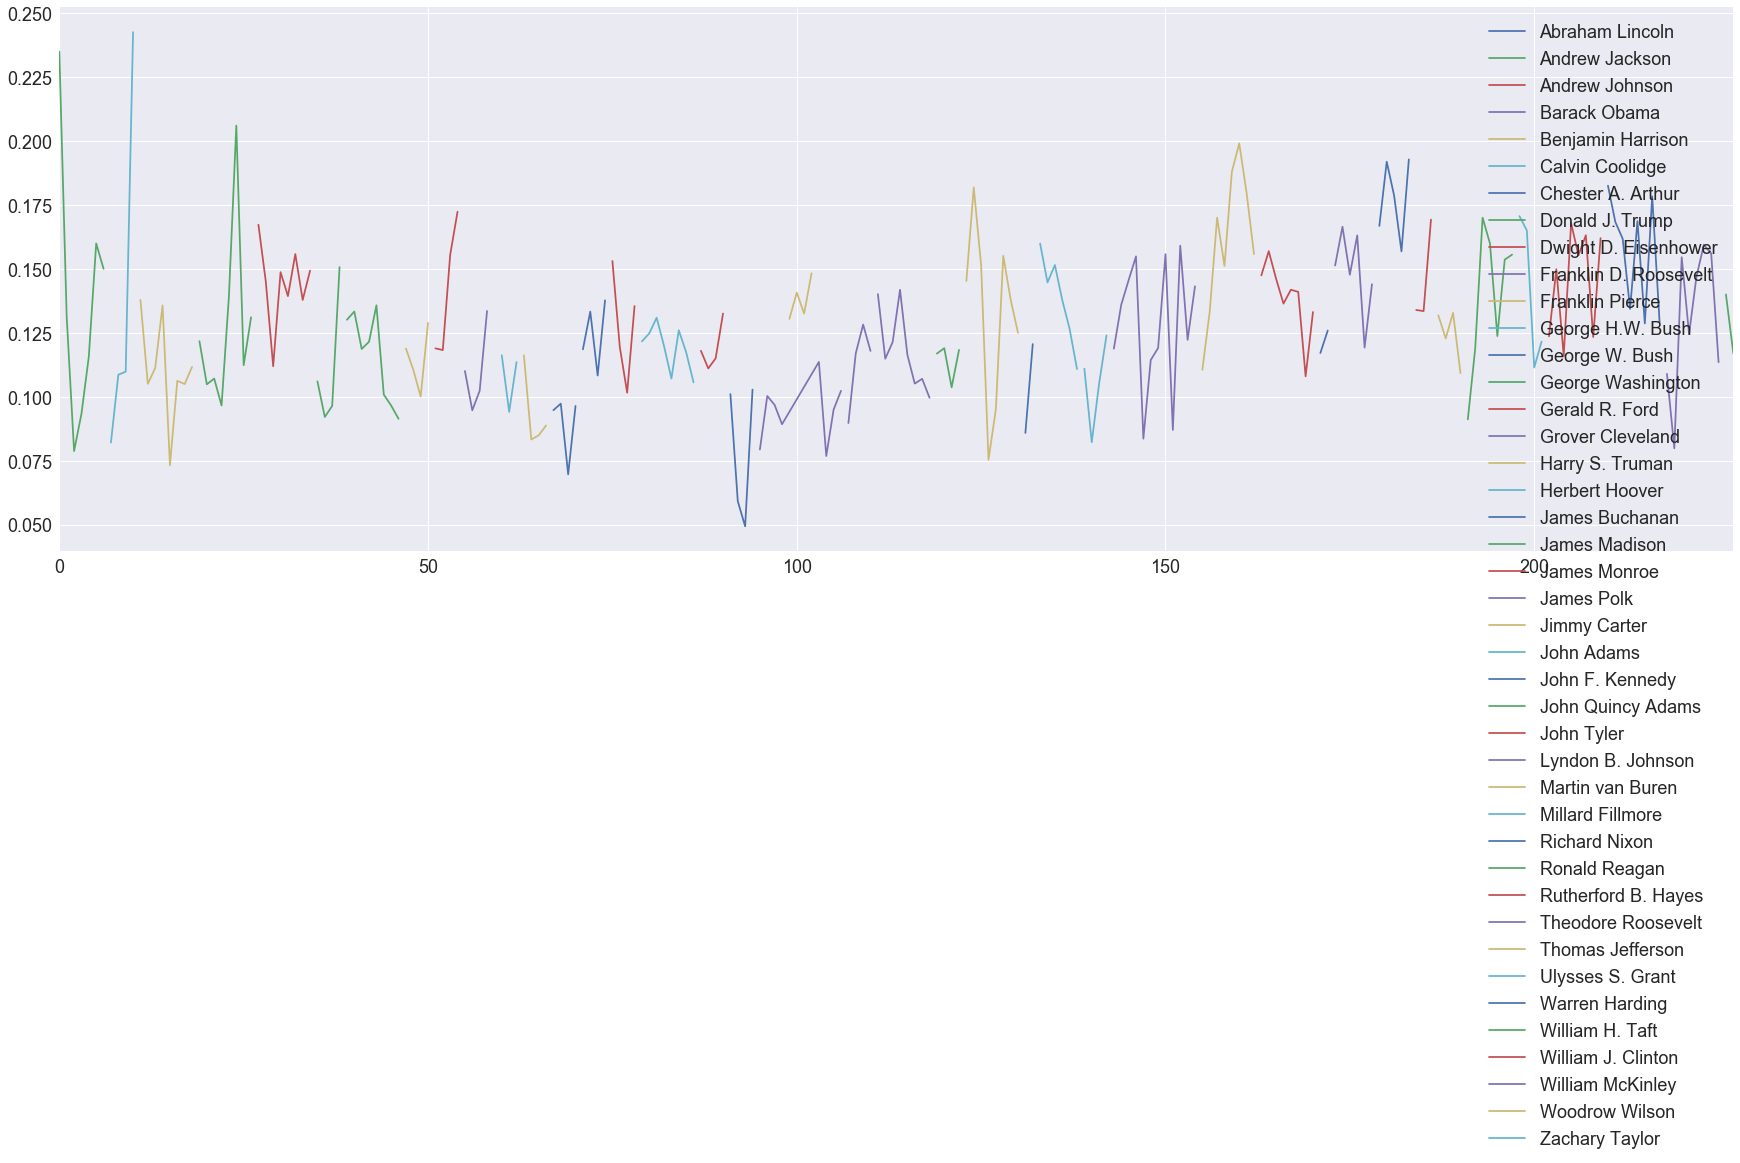

In [19]:
avg_pol = revised_sotu.groupby('president').mean()
revised_sotu.groupby('president')['polarity'].plot(legend=True, figsize=(30,10))

In [20]:
#getting a clean time column that matches our other table
revised_sotu['year'] = revised_sotu['y/m/d'].dt.year
revised_sotu = revised_sotu.rename(columns = {'Party ': 'party', 'Home State':'home state'})
revised_sotu.head()

,y/m/d,president,speech,word count,type,party,home state,polarity,year
0,1790-01-08,George Washington,Fellow-Citizens of the Senate and House of Rep...,1008,spoken,Independent,Virginia,0.235029,1790
1,1791-10-25,George Washington,Fellow-Citizens of the Senate and House of Rep...,2148,spoken,Independent,Virginia,0.131196,1791
2,1792-11-06,George Washington,Fellow-Citizens of the Senate and House of Rep...,1959,spoken,Independent,Virginia,0.078748,1792
3,1793-12-03,George Washington,Fellow-Citizens of the Senate and House of Rep...,1830,spoken,Independent,Virginia,0.093337,1793
4,1794-11-19,George Washington,Fellow-Citizens of the Senate and House of Rep...,2706,spoken,Independent,Virginia,0.115751,1794


# Data Investigation Project: Visuals 

## Data Investigation Project: Word Counts by President 

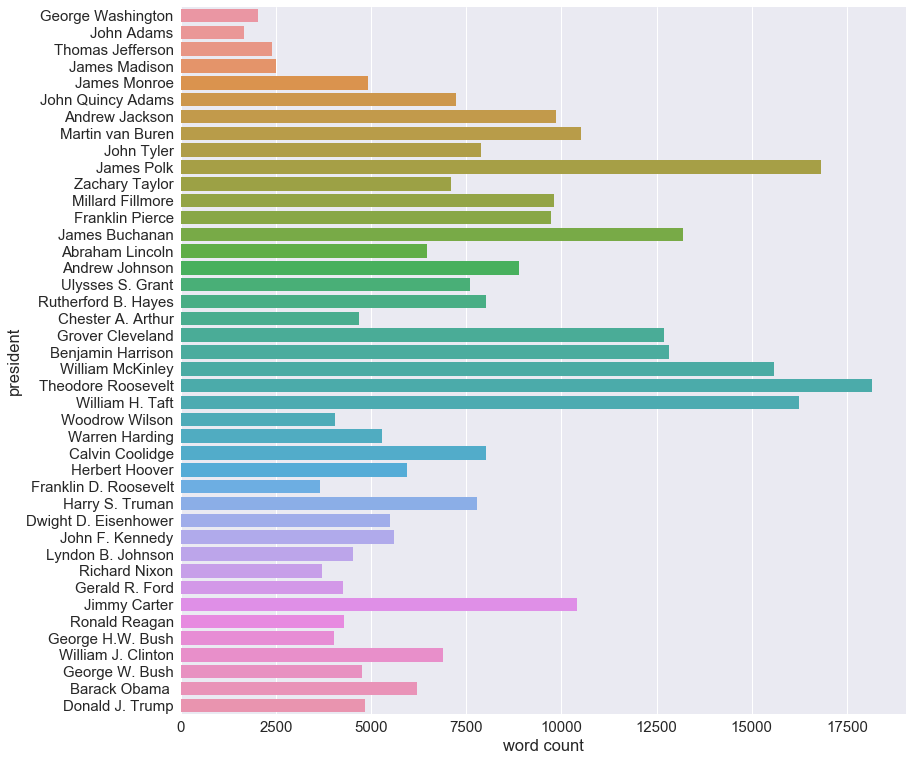

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(13, 13))
sns.set(font_scale=1.5)
president_wc = sotu.groupby('president', sort = False).mean().reset_index()
sns.barplot(data = president_wc, x = 'word count', y = 'president', orient = 'h');

## Data Investigation Project: Word Counts over Time 

As we previously noted, there has been a historical trend in how speeches are addressed and used in their format. After 1913, President Woodrow Wilson pioneered the concept that spoken speeches in-person at Congress can be used to rally the public and support for presidential agenda when previously, speeches were usually written for a long time in the earlier 18 and 19 centuries. This discovery is emphasized in how the average speech for the 19th century was 10,000 words while the late 20th century hovers around 5,000 words. This is because Presidents have found a tool that works in their favor to bring attention to their speech and their agendas by making their intent clear to Congress and the public through media. The first televised address was in 1947 with President Truman and the first live webcast on the Internet was 2002 with President George W. Bush. Even the name "State of the Union Address" was not used until recent times, they were intitally called Annual Message from 1790 to 1946, then called informally as the "state of the Union" message from 1942 to 1946, and officially called "State of the Union Address" from 1947 with its first televised broadcast, according to https://history.house.gov/Institution/SOTU/State-of-the-Union/. 


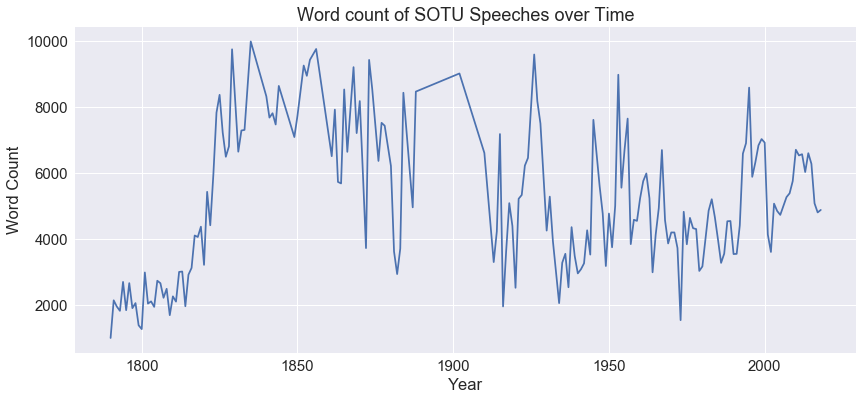

In [22]:
spoken = revised_sotu[revised_sotu['type'] == 'spoken'][['year', 'word count']].set_index('year')
plt.figure(figsize=(14,6))
plt.title('Word count of SOTU Speeches over Time')
plt.ylabel('Word Count')
plt.xlabel('Year')
plt.plot(spoken);

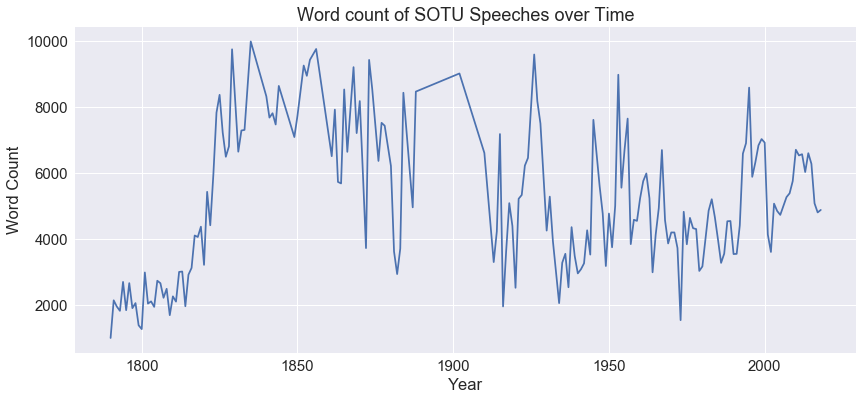

In [23]:
###
pol_over_time = revised_sotu[revised_sotu['type'] == 'spoken'][['year', 'word count']].set_index('year')
pol_over_time = revised_sotu[revised_sotu['type'] == 'spoken'][['year', 'polarity']].set_index('year')
plt.figure(figsize=(14,6))
plt.title('Word count of SOTU Speeches over Time')
plt.ylabel('Word Count')
plt.xlabel('Year')
plt.plot(spoken);
###  

## Data Investigation Project: Average Polarity of Each President 

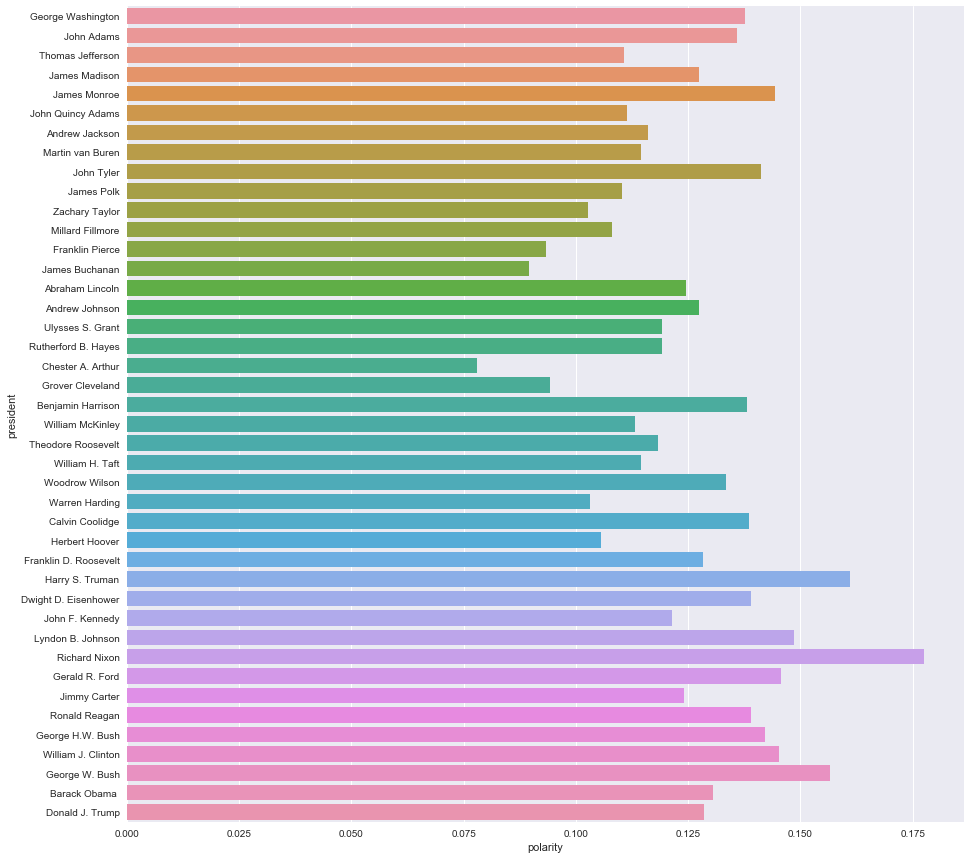

In [24]:
#a copy of the graph code used to save image 
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))
sns.set(font_scale=1)
president_polarity = revised_sotu.groupby('president', sort = False).mean().reset_index()
sns.barplot(data = president_polarity, x = 'polarity', y = 'president', orient = 'h');

fig.savefig('president_polarity.png', dpi=fig.dpi)

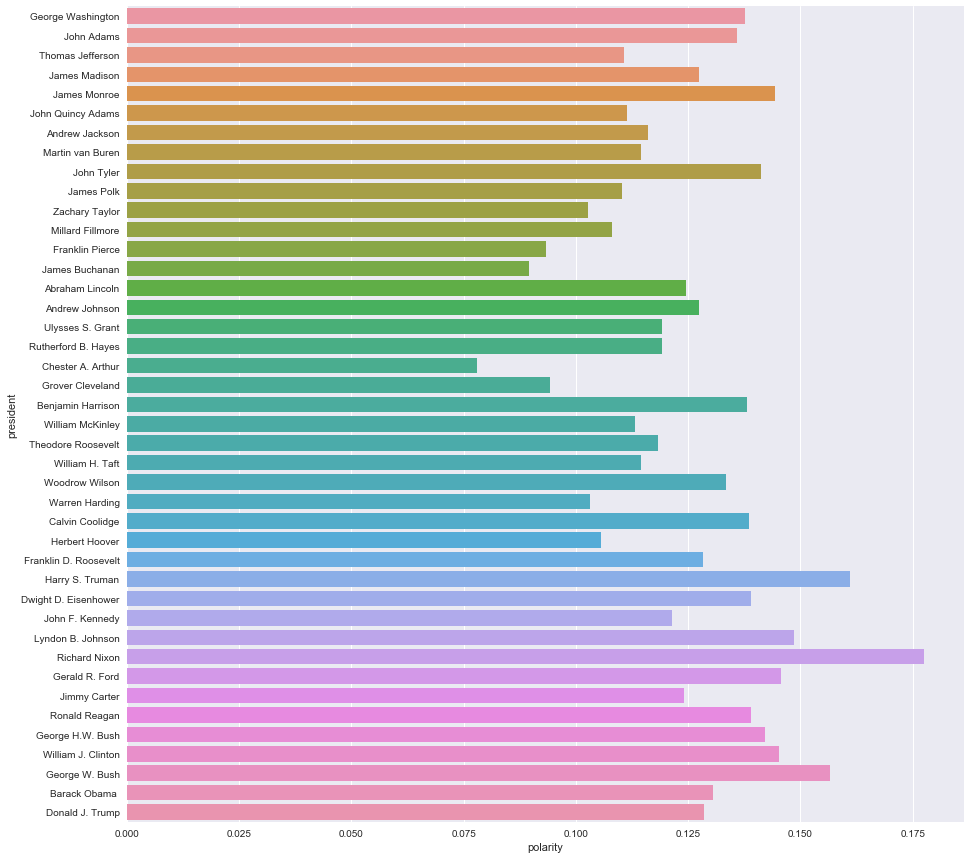

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))
sns.set(font_scale=1)
president_polarity = revised_sotu.groupby('president', sort = False).mean().reset_index()
sns.barplot(data = president_polarity, x = 'polarity', y = 'president', orient = 'h');


## Data Investigation Project: Polarity by Party  and Analysis 

We thought it would be prudent to analyze how polarity might be associated with parties. If some parties use more negatively-associated words or positively-associated words than other presidents, this could be through their overall tone. Intersetingly, we also see how parties have changed over time as well. From analysis of the speeches text, we saw that Democratic Parties and Republican Parties have evolved in how they address certain issues, and some presidents that would be considered Democratic were actually associated with the Republican party while the vice versa also applies. This is due to how issues and parties have evolved with party names reflecting this change. The Democratic party and the Republican party has changed from Jefferson and Madison's Democratic-Republican to National Republican to Democratic to National Union to the Democratic Party and Republican Party pre historical changes made by the 1968 Democratic National Convention to the current Democratic and Republican parties we know today. 

Despite these historical changing in parties and their intent, the presidents associated with those parties seem to hover around the same average polarity. This could imply that presidents' speeches are similar in tone despite changes made in their party structure and simply reflect what they as a president want. It can be a point in favor that instead of the parties maniuplating Presidents in adovacting for their agenda, it is instead presidents that are advocating for their parties to follow their presidential agenda. 

In terms of Trump, the fact that the Republican party has high polarity in its most recent incarnation, this is a point in favor that Trump is an individual who is doing what he wants. If parties' polarity are similar, it does not seem to really matter what their agendas are in terms of sentiment analysis. If all polarities are similar by party, perhaps it is individualistic Presients who account for slight changes in polarity over time. Trump has been heralded as a controversial President, and we can see that despite previous Republican President George W. Bush and the Republican Party's high polarity, President Trump's polarity remains somewhat low in comparison. This may be that Trump is an outlier to the recent high polarity trend seen in the most recent incarnation of the Republican Party.  

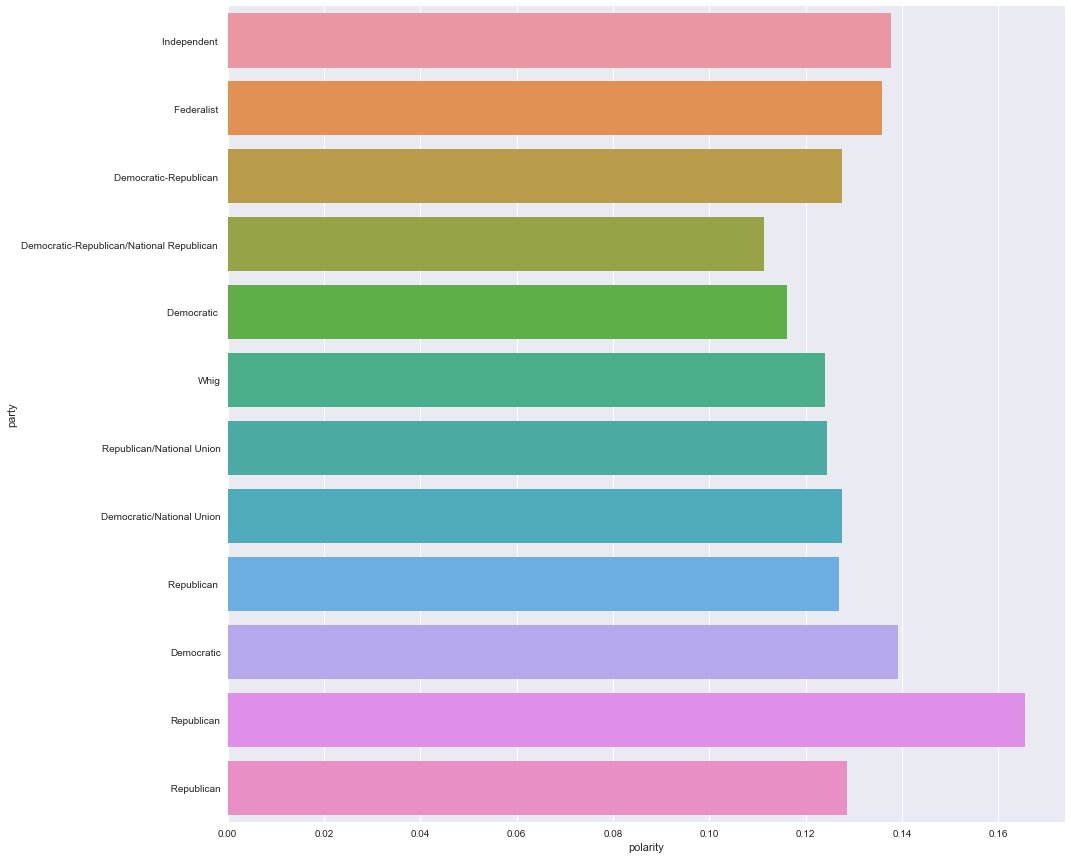

In [26]:
#polarity by party 

sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))
sns.set(font_scale=1)
party_polarity = revised_sotu.groupby('party', sort = False).mean().reset_index()
sns.barplot(data = party_polarity, x = 'polarity', y = 'party', orient = 'h');

## Data Investigation Project: Polarity over Time 

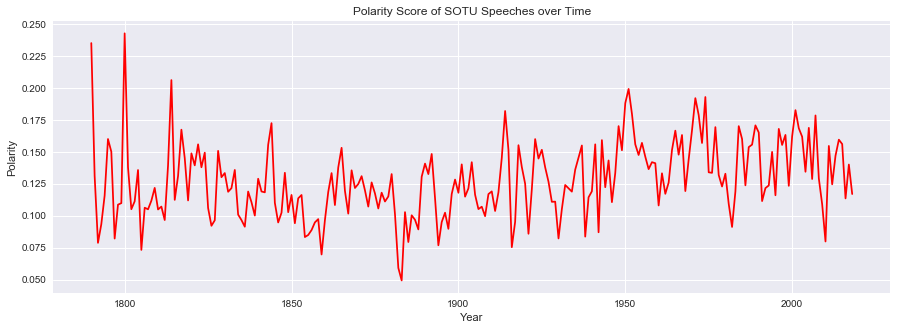

In [27]:
#change to polarity over time 
revised_sotu['year'] = revised_sotu['y/m/d'].dt.year

yearly_polarity = revised_sotu[['year', 'polarity']].set_index('year')
plt.figure(figsize=(15,5))
plt.title('Polarity Score of SOTU Speeches over Time')
plt.ylabel('Polarity')
plt.xlabel('Year')
plt.plot(yearly_polarity, color = 'r');

In [28]:
from wordcloud import WordCloud 
#wordcloud = WordCloud().generate(revised_sotu)
# Generate plot
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.show()

## Data Investigation Project: Visuals - Word Clouds 

In order to visualize what each of the Presidents' speeches might be, we decided to use Word Clouds to show what the top words were that appeared in Presidents' speeches. We thought this would be a good visualization in having a precursory glance to see what the most frequent words are and if that can be correlated to the message of each speech. We had already seen tone by polarity, and we hoped that the word clouds would now show us the topics that were most discussed by presidents. 

### Data Investigation Project: Word Clouds - Concerns 

After having made several Word Clouds for presidents, including famous  individual Presidents, the ten oldest speeches, the ten newest speeches, and all speeches. We made the discovery that many of the WordClouds shared similar words that mean very little overall to the message of the President like "government", "America", and "will". These are place-holder words almost in the speech that do not really add meaning to the speech and cannot be really used to decipher the indiviudal Presidents' meaning because everyone uses it. Many speeches use "will" because state of the union speeches have become paramount in describing what Presidential platforms and tasks he wants to accomplish so the use of "will" is understandable in having to state what he wants to do for the year but does not really add to what the President is actually trying to do and accomplish in the year. 

### Data Investigation Project: Word Clouds - All Speeches 

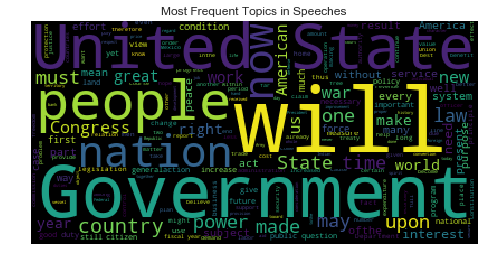

In [29]:

fields = ['speech']

#text2 = pd.read_csv('revised_sotu.csv', usecols=fields)
import matplotlib.pyplot as plt
fig_speech_cloud = plt.figure(figsize=(8, 8))

wordcloud2 = WordCloud().generate(' '.join(revised_sotu['speech']))
plt.title("Most Frequent Topics in Speeches")
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

fig_speech_cloud.savefig('speech_word_cloud.png', dpi=fig.dpi)


### Data Investigation Project: Word Clouds - President Obama (Most Recent Democratic) 

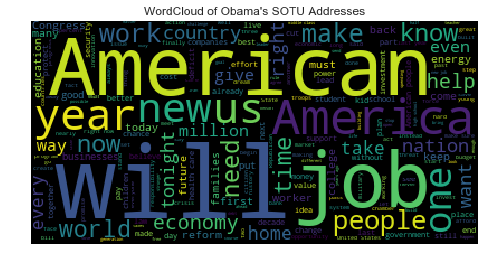

In [30]:
text = revised_sotu[revised_sotu['president'] == 'Barack Obama ']

obama_fields = text['speech']
#print(obama_fields)
#plt.figure(figsize=(15,5))
#wordcloudTrump = WordCloud(width=1500, height=700, max_words=100).generate(text['speech'])



import matplotlib.pyplot as plt
fig_obama = plt.figure(figsize=(8, 8))

wordcloud3 = WordCloud().generate(' '.join(obama_fields))
plt.title("WordCloud of Obama's SOTU Addresses")
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

fig_obama.savefig('obama_word_cloud.png', dpi=fig.dpi)


### Data Investigation Project: Word Clouds - President Jackson (Early Democratic) 

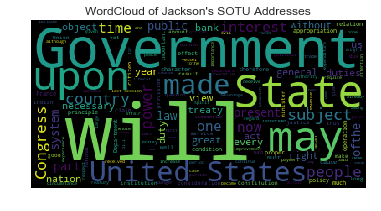

In [31]:
text_jackson = revised_sotu[revised_sotu['president'] == 'Andrew Jackson']

jackson_fields = text_jackson['speech']
#print(jackson_fields)
#plt.figure(figsize=(15,5))
#wordcloudTrump = WordCloud(width=1500, height=700, max_words=100).generate(text['speech'])




wordcloud4 = WordCloud().generate(' '.join(jackson_fields))
plt.title("WordCloud of Jackson's SOTU Addresses")
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()


### Data Investigation Project: Word Clouds - Oldest Ten and Newest Ten Speeches 

Some meaning behind the oldest and newest ten speeches were made behind frequent words that appeared in the Word Clouds. The topics of 'peace', undestandably in the oldest ten speeches after having fought in the American Revolutionary War, is present as well as 'law' because they were focusing on making the Constitution and the previous Articles of Confederation and drafting and petitioning what laws they think it should contain. 

On the otherhand, recent speeches highlighted the word 'job' because that is a current main concern of Presidents to stabilize the job market and ensure Americans have jobs to support themselves. "Health Care", a controversial topic in recent times, also found its way in the recent ten speeches wordcloud because Presidents have made to make their position on it clear. Some topics are generated by the times affecting them. 

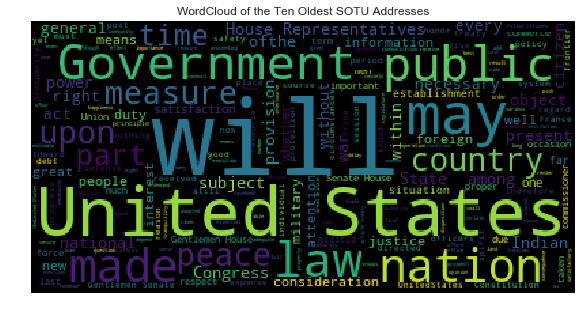

In [32]:
text_oldest_10 = revised_sotu[:10]

oldest_fields = text_oldest_10['speech']
#print(jackson_fields)
#plt.figure(figsize=(15,5))
#wordcloudTrump = WordCloud(width=1500, height=700, max_words=100).generate(text['speech'])


import matplotlib.pyplot as plt
fig_oldest = plt.figure(figsize=(10, 5))

wordcloud5 = WordCloud().generate(' '.join(oldest_fields))
plt.title("WordCloud of the Ten Oldest SOTU Addresses")
plt.imshow(wordcloud5)
plt.axis("off")
plt.show()
fig_oldest.savefig('oldest_word_cloud.png', dpi=fig.dpi)

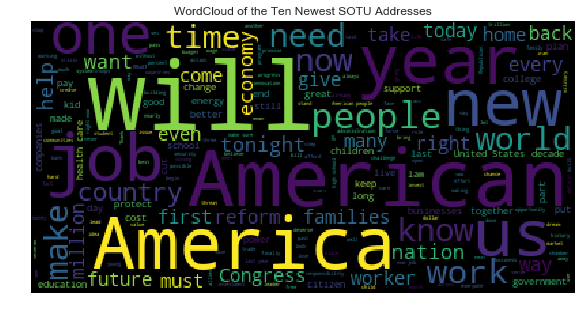

In [33]:
text_newest_10 = revised_sotu.tail(10)

newest_fields = text_newest_10['speech']
#print(jackson_fields)
#plt.figure(figsize=(15,5))
#wordcloudTrump = WordCloud(width=1500, height=700, max_words=100).generate(text['speech'])


import matplotlib.pyplot as plt
fig_newest = plt.figure(figsize=(10, 5))

wordcloud6 = WordCloud().generate(' '.join(newest_fields))
plt.title("WordCloud of the Ten Newest SOTU Addresses")
plt.imshow(wordcloud6)
plt.axis("off")
plt.show()

fig_newest.savefig('newest_word_cloud.png', dpi=fig.dpi)

### Data Investigation Project: Word Cloud - Trump 

In terms of President Trump, our most recent President, we can see that although many big words are shared with other presidents in other word clouds such as 'will', 'American', and 'government', there does seem to be some pretty telling words that might indicate highlighted topics made in his speech. In particular, words like 'drug', 'families', and 'wall' can be seen. This might be in reference to his policies of building a wall to separate Mexico, recent families having been separated due to issues in immigration, and his stance on the opioid crisis and marijuana. The frequent use of these words seem to indicate Trump's fixation on these words and as topics to be discussed in his presidential platform and what he intends his speech to advocate for. Some meaning can be found in how he fixates on these particular words by their frequency and can potentially be seen as a big topic of his speech. 

Personally, we also found it interesting in how Trump also frequently addresses the Speaker with the word 'Ryan'. He is the only president out of the three analyzed to frequently address the Speaker by name and indicates some back-and-forth conversation that may have happened between the two during his speech, and it might indicate that Trump is more willing to do so in comparison to his predesessors. Also to note, 'great' is mentionted in conjunction with Trump's solganed "Make American Great Again" as all words used in the phrase can be found. 

It would not be too extreme to say that by doing so, we can indicate that Trump's speech focused on his policies that he wants to achieve with builing the wall, families being separated, and job markets but also overall in how his speech went with addressing the Speaker casualy by name and using his famous slogan. 

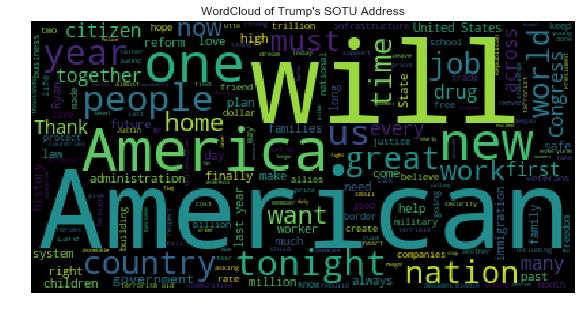

In [34]:
text_trump = revised_sotu[revised_sotu['president'] == 'Donald J. Trump']

trump_fields = text_trump['speech']
#print(jackson_fields)
#plt.figure(figsize=(15,5))
#wordcloudTrump = WordCloud(width=1500, height=700, max_words=100).generate(text['speech'])


import matplotlib.pyplot as plt
fig_trump = plt.figure(figsize=(10, 5))
wordcloud7 = WordCloud().generate(' '.join(trump_fields))
plt.title("WordCloud of Trump's SOTU Address")
plt.imshow(wordcloud7)
plt.axis("off")
plt.show()

fig_trump.savefig('trump_word_cloud.png', dpi=fig.dpi)

# Data Investigation Project: Modelling 

Before delving into the analysis, let's install our dependencies. 

In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from textblob import TextBlob
import re
from wordcloud import WordCloud
import string
import nltk
from nltk import word_tokenize, pos_tag
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
#!pip install gensim
from gensim import corpora, models
from gensim import matutils, models
import scipy.sparse
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text
import numpy as np
from helper import *
import pickle
nltk.download('wordnet');

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\iyerr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Let's reset everything and re|set the dataframe to start the Modelling portion of the project. 

In [36]:
sotu = pd.read_csv('stateunion.tsv', sep='\t',  dtype={'texts':str, 'date':str, 'name':str}, index_col=0)
sotu = sotu.T # We want each speech to be a row instead of a column 
sotu = sotu.reset_index().drop(columns = ['index']) # get rid of row index
sotu = sotu.rename(columns = {'date':'y/m/d', 'name':'president', 'texts':'speech'}) # rename column for clarity purposes
sotu['y/m/d'] = pd.to_datetime(sotu['y/m/d']) # re-format structure of time data
for i in range(len(sotu['speech'])): # get rid of HTML tags and newlines 
    sotu['speech'][i] = re.sub('(?<! )(?<=[.,!:?();])(?! )', r' ', re.sub('<[^<]+?>', '', sotu['speech'][i]).replace('\n', ''))
sotu['word count'] = [len(speech.split(' ')) for speech in sotu['speech'].values] #count number of words per speech 
sotu['type'] = ['spoken' if count <= 12000 else 'written' for count in sotu['word count']] #classify speech type 
presidents = pd.read_csv('revised_presidents.csv') # Data File containing information about every president in SOTU dataset
presidents = presidents.drop(columns = ["Presidency ", "Wikipedia Entry",'Took office ', "Left office ", "Portrait", 'Thumbnail'])
# line above drops unnecessary columns 
sotu = sotu.join(presidents.set_index('President '), on='president') # merge our datasets
sotu.iloc[184] = sotu.iloc[184].fillna({'Party ': 'Republican', 'Home State':'Michigan'}) #fix nulls after merge 
sotu.iloc[185] = sotu.iloc[185].fillna({'Party ': 'Republican', 'Home State':'Michigan'}) 
sotu.iloc[186] = sotu.iloc[186].fillna({'Party ': 'Republican', 'Home State':'Michigan'})
sotu.iloc[218] = sotu.iloc[218].fillna({'Party ': 'Democratic', 'Home State':'Illinois'})
sotu.iloc[219] = sotu.iloc[219].fillna({'Party ': 'Democratic', 'Home State':'Illinois'})
sotu.iloc[220] = sotu.iloc[220].fillna({'Party ': 'Democratic', 'Home State':'Illinois'})
sotu.iloc[221] = sotu.iloc[221].fillna({'Party ': 'Democratic', 'Home State':'Illinois'})
sotu.iloc[222] = sotu.iloc[222].fillna({'Party ': 'Democratic', 'Home State':'Illinois'})
sotu.iloc[223] = sotu.iloc[223].fillna({'Party ': 'Democratic', 'Home State':'Illinois'})
sotu.iloc[224] = sotu.iloc[224].fillna({'Party ': 'Democratic', 'Home State':'Illinois'})
sotu.iloc[225] = sotu.iloc[225].fillna({'Party ': 'Democratic', 'Home State':'Illinois'})
sotu['year'] = sotu['y/m/d'].dt.year # for ease of formatting
sotu = sotu.rename(columns = {'Party ': 'party', 'Home State':'home state'}) #fix formatting issues
sotu['party'] = sotu['party'].str.strip(' ') #fix formatting issues

def get_polarity(text): # add polarity score of speech to dataframe
    """Return the polarity of TEXT"""   
    blob = TextBlob(text)
    return blob.sentiment.polarity

polarities = sotu['speech'].apply(get_polarity)
sotu['polarity'] = polarities #update dataframe with polarity scores 
sotu.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,y/m/d,president,speech,word count,type,party,home state,year,polarity
0,1790-01-08,George Washington,Fellow-Citizens of the Senate and House of Rep...,1008,spoken,Independent,Virginia,1790,0.235029
1,1791-10-25,George Washington,Fellow-Citizens of the Senate and House of Rep...,2148,spoken,Independent,Virginia,1791,0.131196
2,1792-11-06,George Washington,Fellow-Citizens of the Senate and House of Rep...,1959,spoken,Independent,Virginia,1792,0.078748
3,1793-12-03,George Washington,Fellow-Citizens of the Senate and House of Rep...,1830,spoken,Independent,Virginia,1793,0.093337
4,1794-11-19,George Washington,Fellow-Citizens of the Senate and House of Rep...,2706,spoken,Independent,Virginia,1794,0.115751


### Pre-processing

Our main goal here is to do topic extraction. That is, we want to use models to extract the main topics from the text of each speech. To start, we must pre-process our text. This involves removing stop words, stemming, removing punctuation, etc. This is the tedious part before we get to the more exciting analysis.  

In [37]:
"""!mkdir transcripts

for i, c in enumerate(year):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(documents[i], file)
"""
documents = sotu['speech'].values
year = sotu['y/m/d'].dt.year.astype(str)
stemmer = SnowballStemmer('english')
data = {} # data dictionary
for i, c in enumerate(year):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)
        
        
def combine_text(list_of_text): 
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ''.join(list_of_text)
    return combined_text

def combine_text_new(list_of_text): 
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

data_combined = {key: [combine_text(value)] for (key, value) in data.items()}
pd.set_option('max_colwidth',150)

frame = pd.DataFrame.from_dict(data_combined).transpose()
frame.columns = ['speech']
frame = frame.sort_index()

def basic_processing(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

basic = lambda x: basic_processing(x)

basic_frame = pd.DataFrame(frame.speech.apply(basic))

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

f1 = lambda x: lemmatize_stemming(x)
preprocessor = lambda x: preprocess(x)

inter = pd.DataFrame(basic_frame.speech.apply(f1))
inter_1 = pd.DataFrame(inter.speech.apply(preprocess))
final = pd.DataFrame(inter_1.speech.apply(combine_text_new)) 

final.head()

,speech
1790,fellow citizen senat hous repres embrac great satisfact opportun present itselfof congratul present favor prospect publicaffair recent access impo...
1791,fellow citizen senat hous repres vain expect peac indian frontier long alawless unprincipl wretch violat right hospit infring solemn treati receiv...
1792,fellow citizen senat hous repres abat satisfact meet thepres occas felicit continu general abl inform theindian hostil time past distress ournorth...
1793,fellow citizen senat hous repres commenc term call intooffic occas aris express fellow citizen atlarg deep respect sens feel renew testimonyof pub...
1794,fellow citizen senat hous repres mind gracious indulg heaven theamerican peopl nation survey general prosper ofour countri look forward rich power...


Finally, let's turn this dataframe into a term-document matrix for use by our model. We will use the CountVectorizer functioniality provided by sci-kit learn which counts the frequency of words that appear of the english language. 

In [38]:
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(final.speech)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = final.index
#data_dtm.to_pickle("dtm.pkl") #save to local directory

#final.to_pickle('final.pkl') #save to local directory
#pickle.dump(cv, open("cv.pkl", "wb")) # read into memory

### Next Stage: Fitting the Model(s)

With our term-document matrix ready, we can start using our data and putting it into models! We will be using Latent Dirilecht Allocation, an unsupervised learning model, to extract topics from our text data. In the following cells, we will create three models with differing term-document matrices. Finally, we will select the best model and then look at which SOTU speeches predominantely contain which topics.  

What are some of the pros and cons of LDA? Well, some pros include that the model has had proven results over a variety of domains include natural language processing in text, harmony extraction in music, and others. Another pro is that the model is relatively simple since its build on an iterative approach to fitting probability distributions. Cons of this model include that the number of topics (a hyperparameter) needs to be specified beforehand, so domain expertise may be required to extract significant/meaningful results. Another con would be that the model doesn't capture correlation among topics in a given text corpus. 

In the end, we decided to use LDA because it would provide us with a relatively simple result which we could interpret ourselves. Fundamentally, since LDA is an unsupervised algorithm, it will not output a "human" interpretation of a given topic. As we will see, it will only output groups of words which appear with differing frequencies between topics. In other words, we were responsible for coming up with valid interpretations of what the words could represent in terms of topics. We recognize that this could introduce subjectivity and bias, but we did our best to make our interpretations reasonable.

### Model #1: All Words

In [39]:
data = pd.read_pickle('dtm.pkl') #read in our document-term matrix
tdm = data.transpose() # change ddocument-term matrix to term-document matrix for model
sparse_counts = scipy.sparse.csr_matrix(tdm) # construct sparse csr matrix
corpus = matutils.Sparse2Corpus(sparse_counts) # create gensim corpus for model
cv = pickle.load(open("cv.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [40]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=20)
lda.print_topics()

[(0,
  '0.009*"year" + 0.009*"nation" + 0.007*"peopl" + 0.006*"american" + 0.006*"world" + 0.006*"work" + 0.005*"govern" + 0.005*"congress" + 0.005*"america" + 0.005*"need"'),
 (1,
  '0.013*"state" + 0.010*"govern" + 0.007*"unit" + 0.006*"year" + 0.006*"congress" + 0.005*"countri" + 0.005*"nation" + 0.004*"public" + 0.004*"great" + 0.004*"power"')]

### Data Investigation Model #1 All Words: Results

We decided to use all words in all the speech text in feeding our model to use what overall topics would appear. We thought it would be best to compare across all speeches because as we have seen in our exploration data before, many presidents have used similar sounding words such as government, america, and will. It would be best to have a model that uses all words. 

Likewise, we also got words typical such as america, american, congress, nation, and govern. These are all very much words expected to appear in speeches, regardless of president. The modeling just seems to highlight how frequently these words appear and how presidents just seem to frequently use them in their speeches. Because we already preivously knew that all presidents use them, we can say the modeling works in picking very used words, but it cannot be really used to classify which specific topics were used. The overall topic, it was able to gather; american, america, congress, government, etc. 

### Model #2: Nouns 

In [41]:
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [42]:
data_clean = pd.read_pickle('final.pkl')
data_nouns = pd.DataFrame(data_clean.speech.apply(nouns))

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.speech)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
#data_dtmn.head()

# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [43]:
ldnoun = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=20)
ldnoun.print_topics()

[(0,
  '0.021*"state" + 0.011*"unit" + 0.009*"year" + 0.008*"congress" + 0.007*"countri" + 0.007*"nation" + 0.007*"power" + 0.005*"import" + 0.004*"duti" + 0.004*"peopl"'),
 (1,
  '0.015*"year" + 0.015*"nation" + 0.009*"world" + 0.009*"work" + 0.008*"peopl" + 0.007*"state" + 0.007*"congress" + 0.005*"countri" + 0.005*"program" + 0.004*"unit"')]

### Data Investigation Model #2 Nouns: Results 

Again, we see very vague topics being used in our model using nouns. We thought this would work better than simply using all words in narrowing down potential topics, but we discovered we might have had too little then to feed into our model to narrow potential topics down. Thus, we decided to move on and add adjectives. 

### Data Investigation Model #3: Nouns and Adjectives 

We decided to use nouns and adjectives to feed our model. We received a pretty more diverse set of two lists of words that the model thought were the words best suited for a topic. 
Truthfully, we then put some of our subjective thoughts into the model when we came up with what the words corresponded to in title. We thought 'domestic wellness' and 'legal issues' were what the topics selection's words were getting at. This was after careful consideration. We believe that these two topics best suite the model. 



### Model #3: Nouns and Adjectives

In [44]:
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [45]:
data_nouns_adj = pd.DataFrame(data_clean.speech.apply(nouns_adj))
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.speech)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna.head()

# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [46]:
lda_noun_adj = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
for idx, topic in lda_noun_adj.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.005*"america" + 0.005*"program" + 0.004*"help" + 0.004*"feder" + 0.003*"econom" + 0.003*"busi" + 0.003*"problem" + 0.003*"budget" + 0.003*"plan" + 0.003*"live"


Topic: 1 
Words: 0.004*"subject" + 0.004*"general" + 0.003*"treati" + 0.003*"depart" + 0.003*"condit" + 0.003*"report" + 0.003*"constitut" + 0.003*"question" + 0.003*"claim" + 0.002*"attent"




### Data Investigation Model #3 Nouns and Adjectives: Results

We decided to use nouns and adjectives to feed our model. We received a pretty more diverse set of two lists of words that the model thought were the words best suited for a topic. 
Truthfully, we then put some of our subjective thoughts into the model when we came up with what the words corresponded to in title. We thought 'domestic wellness' and 'legal issues' were what the topics selection's words were getting at. This was after careful consideration. We believe that these two topics best suit the model. 

### Now, let's try to look at the most prevalent topic in each SOTU speech to get an idea of how topics have changed over time. 

In [47]:
corpus_transformed = lda_noun_adj[corpusna]
a = []
for topic in corpus_transformed:
    if len(topic) > 1:
        val1 = topic[0][1]
        val2 = topic[1][1]
        if val1 > val2:
            a.append(topic[0][0])
        else:
            a.append(topic[1][0])
    else:
        a.append(topic[0][0])
topic_trend = list(zip(a, data_dtmna.index))
topic_trend

[(1, '1790'),
 (1, '1791'),
 (1, '1792'),
 (1, '1793'),
 (1, '1794'),
 (1, '1795'),
 (1, '1796'),
 (1, '1797'),
 (1, '1798'),
 (1, '1799'),
 (1, '1800'),
 (1, '1801'),
 (1, '1802'),
 (1, '1803'),
 (1, '1804'),
 (1, '1805'),
 (1, '1806'),
 (1, '1807'),
 (1, '1808'),
 (1, '1809'),
 (1, '1810'),
 (1, '1811'),
 (1, '1812'),
 (1, '1813'),
 (1, '1814'),
 (1, '1815'),
 (1, '1816'),
 (1, '1817'),
 (1, '1818'),
 (1, '1819'),
 (1, '1820'),
 (1, '1821'),
 (1, '1822'),
 (1, '1823'),
 (1, '1824'),
 (1, '1825'),
 (1, '1826'),
 (1, '1827'),
 (1, '1828'),
 (1, '1829'),
 (1, '1830'),
 (1, '1831'),
 (1, '1832'),
 (1, '1833'),
 (1, '1834'),
 (1, '1835'),
 (1, '1836'),
 (1, '1837'),
 (1, '1838'),
 (1, '1839'),
 (1, '1840'),
 (1, '1841'),
 (1, '1842'),
 (1, '1843'),
 (1, '1844'),
 (1, '1845'),
 (1, '1846'),
 (1, '1847'),
 (1, '1848'),
 (1, '1849'),
 (1, '1850'),
 (1, '1851'),
 (1, '1852'),
 (1, '1853'),
 (1, '1854'),
 (1, '1855'),
 (1, '1856'),
 (1, '1857'),
 (1, '1858'),
 (1, '1859'),
 (1, '1860'),
 (1, '

If we go through when the topics changed, there definitely seems to be a trend over time. Let's visualize this change. 

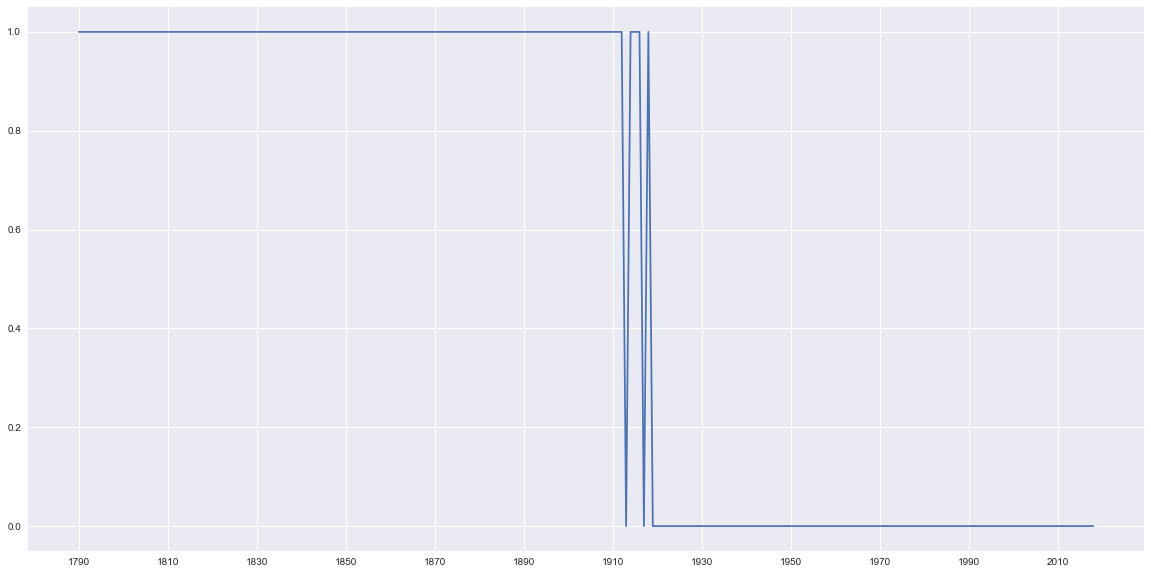

In [48]:
topics = []
years = []
for item in topic_trend:
    topics.append(item[0])
    years.append(item[1])
years = [int(x) for x in years]
frame = pd.DataFrame({'Topics':topics, 'Years':years})
plt.figure(figsize = (20, 10))
plt.xticks(np.arange(1790, 2020, 20))
plt.plot(years, topics);

There's a spike in the middle of our chart where the topics change! Let's focus in on that. 

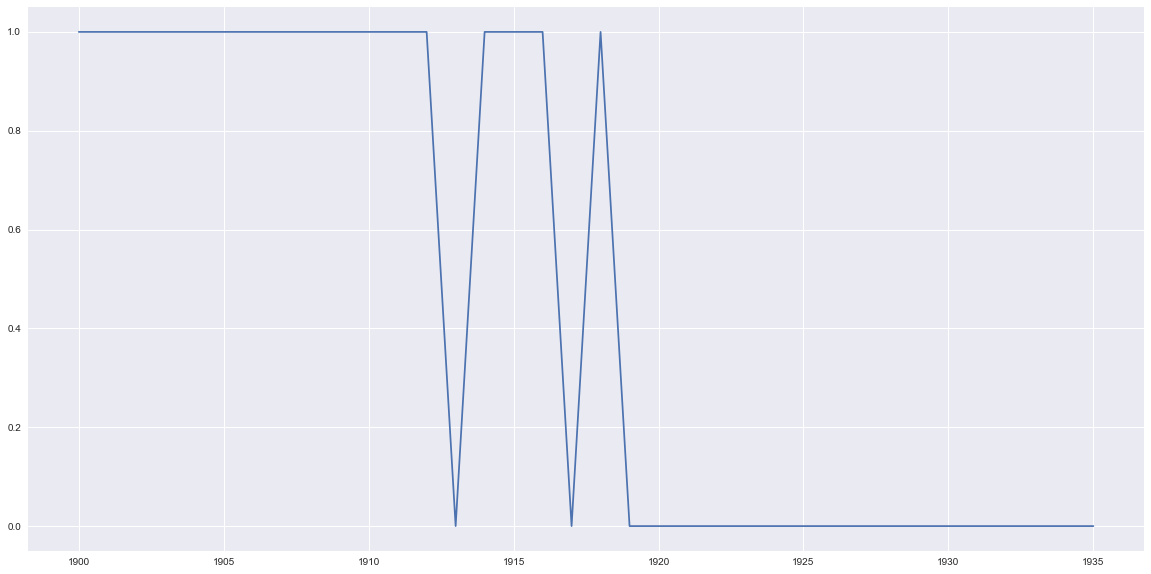

In [49]:
new_frame = frame[(frame['Years'] >= 1900) & (frame['Years'] <= 1935)]
plt.figure(figsize = (20, 10))
plt.plot(new_frame['Years'], new_frame['Topics']);

Interesting Finding: It looks like the topics started to change from "legal issues" towards "domestic wellness" around 1913- the year when Woodrow Wilson became President and changed the SOTU speech format from written to spoken!

### Data Investigation: Modeling Final Results
 
The above output shows the topic that occurred most frequently in the above speech. The 1's and 0's represent the topic which is predominantely occuring in the text, while the number represents the year of the SOTU speech. It looks like there definitely is a trend in the years which focused on Foreign Issues speeches compared to Domestic Wellness. Thus, we have successfully modeled the topics present in State of the Union speeches!

We recognize that a confounding variable may have been a change in speech formats because speeches have changed from being written in nature to spoken, typically in front of Congress. This may have skewed with our results simply because speeches have become shorter by extension of being spoken but in formatting as well. The beginning of the Presidents' speech may all follow the same pattern, but having a speech in front of a modern audience is vastly different from a written letter to formally educated audience of typically only Congress -- this could account for differences in topics themselves. Domestic Wellness is typically a more digestable topic to an audience than what 'legal issues' would in from of law-school educated Congress. 

Then we can also see that Trump's speech is "Domestic Wellness" as a result. In terms of Trump's status in comparison to predecessors, he is very consistent and seems to be following the trends. In this manner, he cannot be said to be a very volatile president in terms of how his issues compare to previous' presidents. Many presidents have been focusing on "Domestic Wellness" and have been following the trend, possibly so as to not appear as cold to American home issues than the previous, but Trump has frequently shown his apparent support for American home issues, especially through his epononymous slogan, "Make America Great Again." Regardless of Trump's actions and policies, his State of the Union speech indicates a following of previous American presidency trends and his support for American domestic wellness. 

### End of Data Investigation Report 